In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2023-07-19 22:40:45.934169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 22:40:45.976616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 22:40:45.977396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 22:40:46.857430: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.0


In [2]:
wine_red_df = pd.read_csv("data/winequality-red.csv", sep=";")
wine_white_df = pd.read_csv("data/winequality-white.csv", sep=";")

In [3]:
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
wine_red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
wine_df = pd.concat([wine_red_df, wine_white_df])

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
# Create X & y
X = wine_df.drop("quality", axis=1)
y = wine_df["quality"]

In [12]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=42, random_state=29)

In [15]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3237,6.4,0.230,0.35,4.60,0.039,43.0,147.0,0.99216,3.18,0.40,11.00
2931,5.2,0.155,0.33,1.60,0.028,13.0,59.0,0.98975,3.30,0.84,11.90
631,7.0,0.230,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.80
2412,6.3,0.380,0.17,8.80,0.080,50.0,212.0,0.99803,3.47,0.66,9.40
4640,6.0,0.240,0.41,1.30,0.036,42.0,118.0,0.99018,3.04,0.64,11.75


In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[0.21487603, 0.1       , 0.21084337, ..., 0.35658915, 0.1011236 ,
        0.43478261],
       [0.11570248, 0.05      , 0.19879518, ..., 0.4496124 , 0.34831461,
        0.56521739],
       [0.26446281, 0.1       , 0.25301205, ..., 0.3875969 , 0.11235955,
        0.11594203],
       ...,
       [0.23140496, 0.16      , 0.13253012, ..., 0.3875969 , 0.25280899,
        0.34782609],
       [0.23140496, 0.08      , 0.19277108, ..., 0.51937984, 0.17977528,
        0.31884058],
       [0.14876033, 0.14666667, 0.06024096, ..., 0.3255814 , 0.14606742,
        0.26086957]])

In [20]:
len(X_train_scaled[0])

11

In [21]:
def mae(y_true=y_test, y_pred=None):
    assert y_pred.any() != None, "y_pred is required"
    return tf.metrics.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true=y_test, y_pred=None):
    assert y_pred.any() != None, "y_pred is required"
    return tf.metrics.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Model

In [22]:
from keras.models import Sequential
from keras.layers import Dense

### Model 1

In [23]:
tf.random.set_seed(29)

model_1 = Sequential([
    Dense(units=11),
    Dense(units=6),
    Dense(units=1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    metrics=["mae"]
)

history1 = model_1.fit(X_train_scaled, y_train, epochs=100, verbose=1)

Epoch 1/100
202/202 [==============================] - 1s 1ms/step - loss: 2.9486 - mae: 2.9486
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 0.7198 - mae: 0.7198
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6609 - mae: 0.6609
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6314 - mae: 0.6314
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6174 - mae: 0.6174
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6065 - mae: 0.6065
Epoch 7/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5981 - mae: 0.5981
Epoch 8/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5909 - mae: 0.5909
Epoch 9/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5856 - mae: 0.5856
Epoch 10/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5804 - mae: 0.5804
Epoch 11/100
202/202 [=================

In [24]:
y_pred_1 = model_1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [25]:
mae_1 = mae(y_pred=y_pred_1)
mse_1 = mse(y_pred=y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=41.307323>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2481.1016>)

Text(0.5, 0, 'epochs')

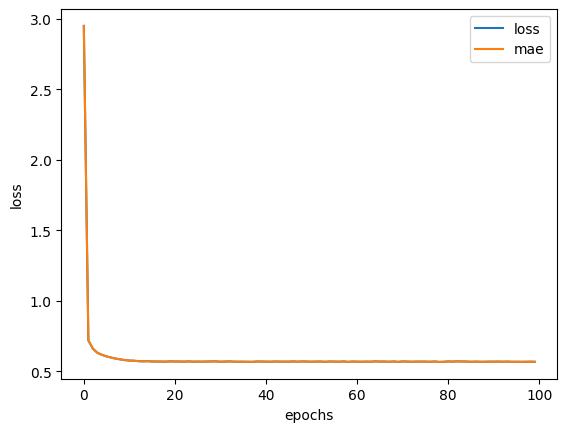

In [26]:
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [27]:
model_1.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6370 - mae: 0.6370


[0.6370161771774292, 0.6370161771774292]

### Model 2

In [28]:
tf.random.set_seed(29)

model_2 = Sequential([
    Dense(11, activation="relu"),
    Dense(6, activation="relu"),
    Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    metrics=["mae"]
)

history2 = model_2.fit(X_train_scaled, y_train, epochs=100, verbose=1)

Epoch 1/100
202/202 [==============================] - 1s 1ms/step - loss: 4.7447 - mae: 4.7447
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 0.9145 - mae: 0.9145
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6914 - mae: 0.6914
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6434 - mae: 0.6434
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6215 - mae: 0.6215
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6085 - mae: 0.6085
Epoch 7/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5988 - mae: 0.5988
Epoch 8/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5909 - mae: 0.5909
Epoch 9/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5857 - mae: 0.5857
Epoch 10/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5805 - mae: 0.5805
Epoch 11/100
202/202 [=================

In [29]:
y_pred_2 = model_2.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [30]:
mae_2 = mae(y_pred=y_pred_2)
mse_2 = mse(y_pred=y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=129.91406>,
 <tf.Tensor: shape=(), dtype=float32, numpy=19663.209>)

Text(0.5, 0, 'epochs')

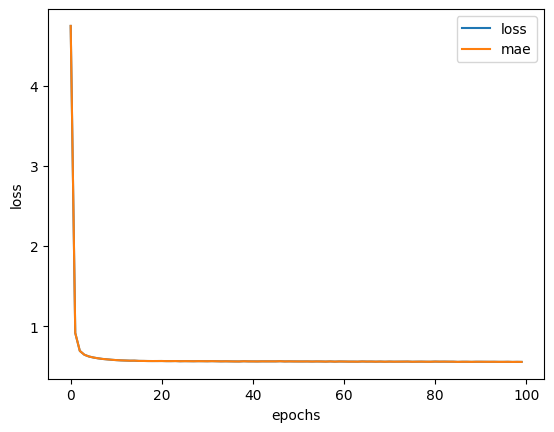

In [31]:
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [32]:
model_2.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6254 - mae: 0.6254


[0.625434398651123, 0.625434398651123]

In [33]:
from keras.utils import plot_model

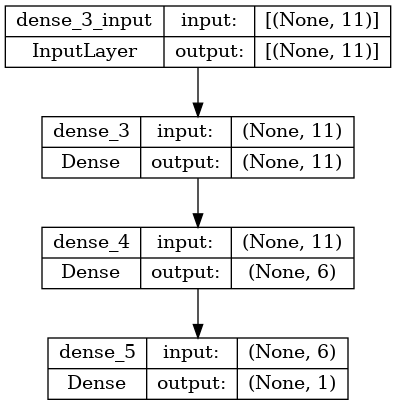

In [34]:
plot_model(model_2, show_shapes=True)

### Model 3

In [35]:
model_3 = Sequential([
    Dense(64, activation="relu", input_shape=[11]),
    Dense(32, activation="relu"),
    Dense(1, activation="linear")
])

model_3.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

history3 = model_3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
202/202 [==============================] - 1s 1ms/step - loss: 7.6801 - mae: 1.9788 - mse: 7.6801
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 0.7570 - mae: 0.6813 - mse: 0.7570
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6695 - mae: 0.6333 - mse: 0.6695
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6319 - mae: 0.6147 - mse: 0.6319
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 0.6044 - mae: 0.6014 - mse: 0.6044
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5749 - mae: 0.5861 - mse: 0.5749
Epoch 7/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5622 - mae: 0.5793 - mse: 0.5622
Epoch 8/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5458 - mae: 0.5710 - mse: 0.5458
Epoch 9/100
202/202 [==============================] - 0s 1ms/step - loss: 0.5381 - mae: 0.5667 - mse: 0.5381
Epoch 10/1

In [36]:
y_pred_3 = model_3.predict(X_test_scaled)

2/2 [==============================] - 0s 2ms/step


In [37]:
mae_3 = mae(y_pred=y_pred_3)
mse_3 = mse(y_pred=y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.6361262>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.60958415>)

Text(0.5, 0, 'epochs')

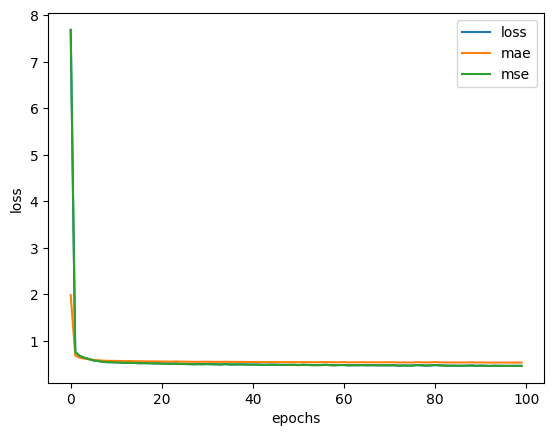

In [38]:
pd.DataFrame(history3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [39]:
model_3.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6096 - mae: 0.6361 - mse: 0.6096


[0.6095841526985168, 0.6361262202262878, 0.6095841526985168]

### Model 4 

In [40]:
model_4 = Sequential([
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])

model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    metrics=["mae", "mse"]
)

history4 = model_4.fit(X_train_scaled, y_train, epochs=200, verbose=1)

Epoch 1/200
202/202 [==============================] - 1s 1ms/step - loss: 2.0320 - mae: 2.0320 - mse: 8.2200
Epoch 2/200
202/202 [==============================] - 0s 1ms/step - loss: 0.6441 - mae: 0.6441 - mse: 0.6905
Epoch 3/200
202/202 [==============================] - 0s 1ms/step - loss: 0.6108 - mae: 0.6108 - mse: 0.6323
Epoch 4/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5916 - mae: 0.5916 - mse: 0.5954
Epoch 5/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5789 - mae: 0.5789 - mse: 0.5689
Epoch 6/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5760 - mae: 0.5760 - mse: 0.5622
Epoch 7/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5695 - mae: 0.5695 - mse: 0.5488
Epoch 8/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5667 - mae: 0.5667 - mse: 0.5442
Epoch 9/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5638 - mae: 0.5638 - mse: 0.5414
Epoch 10/2

In [41]:
y_pred_4 = model_4.predict(X_test_scaled)

2/2 [==============================] - 0s 2ms/step


In [42]:
mae_4 = mae(y_pred=y_pred_4)
mse_4 = mse(y_pred=y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.55468017>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.52489907>)

Text(0.5, 0, 'epochs')

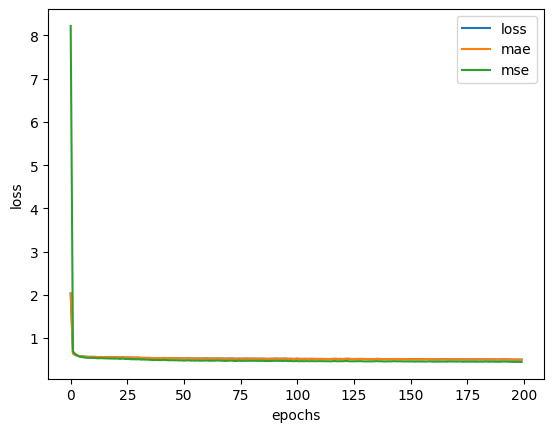

In [43]:
pd.DataFrame(history4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [44]:
model_4.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5547 - mae: 0.5547 - mse: 0.5249


[0.5546802878379822, 0.5546802878379822, 0.5248991250991821]

### Model 5

In [45]:
model_5 = Sequential([
    Dense(100, activation="relu"),
    Dense(50, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])

model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    metrics=["mae", "mse"]
)

history5 = model_5.fit(X_train_scaled, y_train, epochs=200, verbose=1)

Epoch 1/200
202/202 [==============================] - 1s 1ms/step - loss: 1.8498 - mae: 1.8498 - mse: 7.3635
Epoch 2/200
202/202 [==============================] - 0s 1ms/step - loss: 0.6304 - mae: 0.6304 - mse: 0.6680
Epoch 3/200
202/202 [==============================] - 0s 1ms/step - loss: 0.6001 - mae: 0.6001 - mse: 0.6134
Epoch 4/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5837 - mae: 0.5837 - mse: 0.5789
Epoch 5/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5731 - mae: 0.5731 - mse: 0.5564
Epoch 6/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5747 - mae: 0.5747 - mse: 0.5598
Epoch 7/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5690 - mae: 0.5690 - mse: 0.5463
Epoch 8/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5658 - mae: 0.5658 - mse: 0.5417
Epoch 9/200
202/202 [==============================] - 0s 1ms/step - loss: 0.5636 - mae: 0.5636 - mse: 0.5390
Epoch 10/2

In [46]:
y_pred_5 = model_5.predict(X_test_scaled)

2/2 [==============================] - 0s 2ms/step


In [47]:
mae_5 = mae(y_pred=y_pred_5)
mse_5 = mse(y_pred=y_pred_5)

mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.55192256>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5351167>)

Text(0.5, 0, 'epochs')

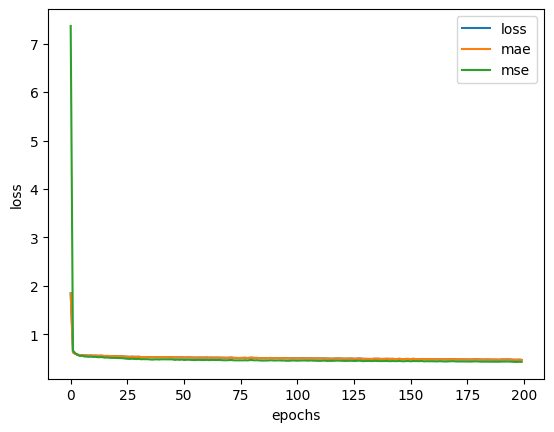

In [48]:
pd.DataFrame(history5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [49]:
model_5.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5519 - mae: 0.5519 - mse: 0.5351


[0.5519225597381592, 0.5519225597381592, 0.5351167321205139]

In [50]:
# Comparing results
model_results = [
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
    ["model_4", mae_4.numpy(), mse_4.numpy()],
    ["model_5", mae_5.numpy(), mse_5.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,41.307323,2481.101562
1,model_2,129.914062,19663.208984
2,model_3,0.636126,0.609584
3,model_4,0.554680,0.524899
4,model_5,0.551923,0.535117


In [52]:
# Best model → model_4
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               1200      
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
best_model_predictions = model_4.predict(X_test_scaled).round()

2/2 [==============================] - 0s 3ms/step


In [67]:
model_4.predict(X_test_scaled)[0], best_model_predictions[0], y_test.iloc[0]

2/2 [==============================] - 0s 2ms/step


(array([5.8717732], dtype=float32), array([6.], dtype=float32), 6)